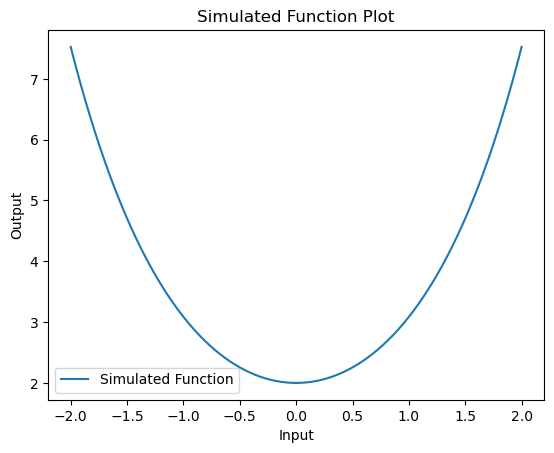

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

def simulate_function(x):
    return np.exp(x)+np.exp(-1*x) 

x_train = np.expand_dims(np.arange(-3, 3, 0.001),1)
y_train = simulate_function(x_train)

x_val = np.linspace(-2, 2, 2000)
y_val = simulate_function(x_val)

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_val = torch.tensor(x_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

plt.plot(x_val, y_val, label='Simulated Function')
plt.title('Simulated Function Plot')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

In [2]:
class Model(nn.Module):
    def __init__(self,):
        super(Model, self).__init__()
    
        self.input_layer = nn.Linear(1, 12)
        
        self.hidden_layers = nn.ModuleList([
            nn.Linear(12, 10),
            nn.Linear(10, 18),
            nn.Linear(18, 8),
            nn.Linear(8, 6),
            nn.Linear(6, 5)
        ])
        
        
        self.output_layer = nn.Linear(5, 1)
        

    def forward(self, x):
        x = self.input_layer(x)
        x = F.leaky_relu(x, negative_slope=0.2)
        
        for hidden_layer in self.hidden_layers:
            x = hidden_layer(x)
            x = F.leaky_relu(x, negative_slope=0.2)
        
        output = self.output_layer(x)
        return output

model = Model()

optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)
loss_function = torch.nn.MSELoss()

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear_1 = nn.Linear(1, 4)
        self.linear_2 = nn.Linear(4, 9)
        self.linear_3 = nn.Linear(9, 12)
        `
        self.linear_6 = nn.Linear(10, 10)
        self.linear_7 = nn.Linear(10, 4)
        self.predict = nn.Linear(4, 1)

    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear_1(x))
        x = nn.functional.leaky_relu(self.linear_2(x))
        x = nn.functional.leaky_relu(self.linear_3(x))
        x = nn.functional.leaky_relu(self.linear_4(x))
        x = nn.functional.leaky_relu(self.linear_5(x))
        x = nn.functional.leaky_relu(self.linear_6(x))
        x = nn.functional.leaky_relu(self.linear_7(x))

        x = self.predict(x)
        return x

In [3]:
def train_model(model, optimizer, x_train, y_train):
    model.train()
    epochs = 1000
    tolerance = 1e-5
    losses = []
    grad_arr = []
    epoch_arr = []

    for epoch in range(epochs):
        epoch_arr.append(epoch)
        loss_m_val = 0.001
        min_ratio = 0.001
        optimizer.zero_grad()
        outputs = model(x_train)
        loss = loss_function(outputs, y_train)
        loss.backward()
        optimizer.step()

        losses.append(loss.detach().numpy())
        
        grad_all = 0.0
        for p in model.parameters():
            grad = 0.0
            if p.grad is not None:
                grad = (p.grad.cpu().data.numpy()**2).sum()
            grad_all += grad
        grad_norm = grad_all ** 0.5
        
        grad_arr.append(grad_norm)

        if epoch % 50 == 0:
            print(f'Epoch: {epoch}, Loss = {loss.item():.4f}')

        total_params=sum(p.numel() for p in model.parameters())
        if grad_norm < 0.001 or epoch == epochs:
            print('Gradient norm reached minimum value')
            predicted_y = model(x_train)
            loss_m=loss_func(outputs, y_train)
            H = torch.zeros((total_params, total_params))

            Jacob = torch.autograd.grad(lossm, list(model.parameters()), create_graph=True)
            Jacob = torch.cat([e.flatten() for e in Jacob]) 
            for i in range(total_params):
                result = torch.autograd.grad(Jacob[i], list(model.parameters()), retain_graph=True)
                H[i] = torch.cat([r.flatten() for r in result]) 
            H_eig=torch.symeig(H).eigenvalues
            positive_count=0
            for i in H_eig.tolist():
                if(i>0):
                    positive_count+=1
            min_ratio = positive_count/H.shape[0]
            print('Minimal Ratio: ', min_ratio, ' , Loss: ', loss_m_val.data.detach().numpy(), ' Epoch: ', epoch)
            loss_m_val=loss_m.data.detach().numpy()
            break


    return loss_m_val, min_ratio

In [4]:
losses = []
min_ratios = []
for index in range(100):
    loss_func = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

    loss_value, min_ratio = train_model(model,optimizer, x_train, y_train)
    losses.append(loss_value)
    min_ratios.append(min_ratio)

Epoch: 0, Loss = 65.4698
Epoch: 50, Loss = 57.6467
Epoch: 100, Loss = 51.5492
Epoch: 150, Loss = 46.5760
Epoch: 200, Loss = 42.5089
Epoch: 250, Loss = 39.1827
Epoch: 300, Loss = 36.4628
Epoch: 350, Loss = 34.2393
Epoch: 400, Loss = 32.4222
Epoch: 450, Loss = 30.9377
Epoch: 500, Loss = 29.7255
Epoch: 550, Loss = 28.7365
Epoch: 600, Loss = 27.9305
Epoch: 650, Loss = 27.2743
Epoch: 700, Loss = 26.7405
Epoch: 750, Loss = 26.3065
Epoch: 800, Loss = 25.9536
Epoch: 850, Loss = 25.6659
Epoch: 900, Loss = 25.4301
Epoch: 950, Loss = 25.2363
Epoch: 0, Loss = 25.0760
Epoch: 50, Loss = 24.9422
Epoch: 100, Loss = 24.8286
Epoch: 150, Loss = 24.7298
Epoch: 200, Loss = 24.6410
Epoch: 250, Loss = 24.5575
Epoch: 300, Loss = 24.4738
Epoch: 350, Loss = 24.3843
Epoch: 400, Loss = 24.2819
Epoch: 450, Loss = 24.1565
Epoch: 500, Loss = 23.9960
Epoch: 550, Loss = 23.7788
Epoch: 600, Loss = 23.4719
Epoch: 650, Loss = 23.0379
Epoch: 700, Loss = 22.4570
Epoch: 750, Loss = 21.7275
Epoch: 800, Loss = 20.7266
Epoch: 

Epoch: 800, Loss = 0.0105
Epoch: 850, Loss = 0.0104
Epoch: 900, Loss = 0.0104
Epoch: 950, Loss = 0.0103
Epoch: 0, Loss = 0.0103
Epoch: 50, Loss = 0.0103
Epoch: 100, Loss = 0.0102
Epoch: 150, Loss = 0.0102
Epoch: 200, Loss = 0.0101
Epoch: 250, Loss = 0.0101
Epoch: 300, Loss = 0.0101
Epoch: 350, Loss = 0.0100
Epoch: 400, Loss = 0.0100
Epoch: 450, Loss = 0.0099
Epoch: 500, Loss = 0.0099
Epoch: 550, Loss = 0.0099
Epoch: 600, Loss = 0.0098
Epoch: 650, Loss = 0.0098
Epoch: 700, Loss = 0.0098
Epoch: 750, Loss = 0.0097
Epoch: 800, Loss = 0.0097
Epoch: 850, Loss = 0.0096
Epoch: 900, Loss = 0.0096
Epoch: 950, Loss = 0.0096
Epoch: 0, Loss = 0.0095
Epoch: 50, Loss = 0.0095
Epoch: 100, Loss = 0.0095
Epoch: 150, Loss = 0.0094
Epoch: 200, Loss = 0.0094
Epoch: 250, Loss = 0.0094
Epoch: 300, Loss = 0.0093
Epoch: 350, Loss = 0.0093
Epoch: 400, Loss = 0.0093
Epoch: 450, Loss = 0.0092
Epoch: 500, Loss = 0.0092
Epoch: 550, Loss = 0.0092
Epoch: 600, Loss = 0.0091
Epoch: 650, Loss = 0.0091
Epoch: 700, Loss =

Epoch: 650, Loss = 0.0040
Epoch: 700, Loss = 0.0040
Epoch: 750, Loss = 0.0039
Epoch: 800, Loss = 0.0039
Epoch: 850, Loss = 0.0039
Epoch: 900, Loss = 0.0039
Epoch: 950, Loss = 0.0039
Epoch: 0, Loss = 0.0039
Epoch: 50, Loss = 0.0039
Epoch: 100, Loss = 0.0039
Epoch: 150, Loss = 0.0039
Epoch: 200, Loss = 0.0039
Epoch: 250, Loss = 0.0038
Epoch: 300, Loss = 0.0038
Epoch: 350, Loss = 0.0038
Epoch: 400, Loss = 0.0038
Epoch: 450, Loss = 0.0038
Epoch: 500, Loss = 0.0038
Epoch: 550, Loss = 0.0038
Epoch: 600, Loss = 0.0038
Epoch: 650, Loss = 0.0038
Epoch: 700, Loss = 0.0038
Epoch: 750, Loss = 0.0038
Epoch: 800, Loss = 0.0037
Epoch: 850, Loss = 0.0037
Epoch: 900, Loss = 0.0037
Epoch: 950, Loss = 0.0037
Epoch: 0, Loss = 0.0037
Epoch: 50, Loss = 0.0037
Epoch: 100, Loss = 0.0037
Epoch: 150, Loss = 0.0037
Epoch: 200, Loss = 0.0037
Epoch: 250, Loss = 0.0037
Epoch: 300, Loss = 0.0036
Epoch: 350, Loss = 0.0036
Epoch: 400, Loss = 0.0036
Epoch: 450, Loss = 0.0036
Epoch: 500, Loss = 0.0036
Epoch: 550, Loss =

Epoch: 550, Loss = 0.0019
Epoch: 600, Loss = 0.0019
Epoch: 650, Loss = 0.0019
Epoch: 700, Loss = 0.0019
Epoch: 750, Loss = 0.0019
Epoch: 800, Loss = 0.0019
Epoch: 850, Loss = 0.0019
Epoch: 900, Loss = 0.0019
Epoch: 950, Loss = 0.0019
Epoch: 0, Loss = 0.0019
Epoch: 50, Loss = 0.0019
Epoch: 100, Loss = 0.0018
Epoch: 150, Loss = 0.0018
Epoch: 200, Loss = 0.0018
Epoch: 250, Loss = 0.0018
Epoch: 300, Loss = 0.0018
Epoch: 350, Loss = 0.0018
Epoch: 400, Loss = 0.0018
Epoch: 450, Loss = 0.0018
Epoch: 500, Loss = 0.0018
Epoch: 550, Loss = 0.0018
Epoch: 600, Loss = 0.0018
Epoch: 650, Loss = 0.0018
Epoch: 700, Loss = 0.0018
Epoch: 750, Loss = 0.0018
Epoch: 800, Loss = 0.0018
Epoch: 850, Loss = 0.0018
Epoch: 900, Loss = 0.0018
Epoch: 950, Loss = 0.0018
Epoch: 0, Loss = 0.0018
Epoch: 50, Loss = 0.0018
Epoch: 100, Loss = 0.0018
Epoch: 150, Loss = 0.0018
Epoch: 200, Loss = 0.0018
Epoch: 250, Loss = 0.0018
Epoch: 300, Loss = 0.0018
Epoch: 350, Loss = 0.0018
Epoch: 400, Loss = 0.0018
Epoch: 450, Loss =

Epoch: 450, Loss = 0.0011
Epoch: 500, Loss = 0.0011
Epoch: 550, Loss = 0.0011
Epoch: 600, Loss = 0.0011
Epoch: 650, Loss = 0.0011
Epoch: 700, Loss = 0.0011
Epoch: 750, Loss = 0.0011
Epoch: 800, Loss = 0.0011
Epoch: 850, Loss = 0.0011
Epoch: 900, Loss = 0.0011
Epoch: 950, Loss = 0.0011
Epoch: 0, Loss = 0.0011
Epoch: 50, Loss = 0.0011
Epoch: 100, Loss = 0.0011
Epoch: 150, Loss = 0.0011
Epoch: 200, Loss = 0.0011
Epoch: 250, Loss = 0.0011
Epoch: 300, Loss = 0.0011
Epoch: 350, Loss = 0.0011
Epoch: 400, Loss = 0.0011
Epoch: 450, Loss = 0.0011
Epoch: 500, Loss = 0.0011
Epoch: 550, Loss = 0.0011
Epoch: 600, Loss = 0.0011
Epoch: 650, Loss = 0.0011
Epoch: 700, Loss = 0.0011
Epoch: 750, Loss = 0.0011
Epoch: 800, Loss = 0.0011
Epoch: 850, Loss = 0.0011
Epoch: 900, Loss = 0.0011
Epoch: 950, Loss = 0.0011
Epoch: 0, Loss = 0.0011
Epoch: 50, Loss = 0.0011
Epoch: 100, Loss = 0.0011
Epoch: 150, Loss = 0.0011
Epoch: 200, Loss = 0.0011
Epoch: 250, Loss = 0.0011
Epoch: 300, Loss = 0.0011
Epoch: 350, Loss =

Epoch: 300, Loss = 0.0008
Epoch: 350, Loss = 0.0008
Epoch: 400, Loss = 0.0008
Epoch: 450, Loss = 0.0008
Epoch: 500, Loss = 0.0008
Epoch: 550, Loss = 0.0008
Epoch: 600, Loss = 0.0008
Epoch: 650, Loss = 0.0008
Epoch: 700, Loss = 0.0008
Epoch: 750, Loss = 0.0008
Epoch: 800, Loss = 0.0008
Epoch: 850, Loss = 0.0008
Epoch: 900, Loss = 0.0008
Epoch: 950, Loss = 0.0008
Epoch: 0, Loss = 0.0008
Epoch: 50, Loss = 0.0008
Epoch: 100, Loss = 0.0008
Epoch: 150, Loss = 0.0008
Epoch: 200, Loss = 0.0008
Epoch: 250, Loss = 0.0008
Epoch: 300, Loss = 0.0008
Epoch: 350, Loss = 0.0008
Epoch: 400, Loss = 0.0008
Epoch: 450, Loss = 0.0008
Epoch: 500, Loss = 0.0008
Epoch: 550, Loss = 0.0008
Epoch: 600, Loss = 0.0008
Epoch: 650, Loss = 0.0008
Epoch: 700, Loss = 0.0008
Epoch: 750, Loss = 0.0008
Epoch: 800, Loss = 0.0008
Epoch: 850, Loss = 0.0008
Epoch: 900, Loss = 0.0008
Epoch: 950, Loss = 0.0008
Epoch: 0, Loss = 0.0008
Epoch: 50, Loss = 0.0008
Epoch: 100, Loss = 0.0008
Epoch: 150, Loss = 0.0008
Epoch: 200, Loss =

Epoch: 150, Loss = 0.0006
Epoch: 200, Loss = 0.0006
Epoch: 250, Loss = 0.0006
Epoch: 300, Loss = 0.0006
Epoch: 350, Loss = 0.0006
Epoch: 400, Loss = 0.0006
Epoch: 450, Loss = 0.0006
Epoch: 500, Loss = 0.0006
Epoch: 550, Loss = 0.0006
Epoch: 600, Loss = 0.0006
Epoch: 650, Loss = 0.0006
Epoch: 700, Loss = 0.0006
Epoch: 750, Loss = 0.0006
Epoch: 800, Loss = 0.0006
Epoch: 850, Loss = 0.0006
Epoch: 900, Loss = 0.0006
Epoch: 950, Loss = 0.0006
Epoch: 0, Loss = 0.0006
Epoch: 50, Loss = 0.0006
Epoch: 100, Loss = 0.0006
Epoch: 150, Loss = 0.0006
Epoch: 200, Loss = 0.0006
Epoch: 250, Loss = 0.0006
Epoch: 300, Loss = 0.0006
Epoch: 350, Loss = 0.0006
Epoch: 400, Loss = 0.0006
Epoch: 450, Loss = 0.0006
Epoch: 500, Loss = 0.0006
Epoch: 550, Loss = 0.0006
Epoch: 600, Loss = 0.0006
Epoch: 650, Loss = 0.0006
Epoch: 700, Loss = 0.0006
Epoch: 750, Loss = 0.0006
Epoch: 800, Loss = 0.0006
Epoch: 850, Loss = 0.0006
Epoch: 900, Loss = 0.0006
Epoch: 950, Loss = 0.0006
Epoch: 0, Loss = 0.0006
Epoch: 50, Loss =

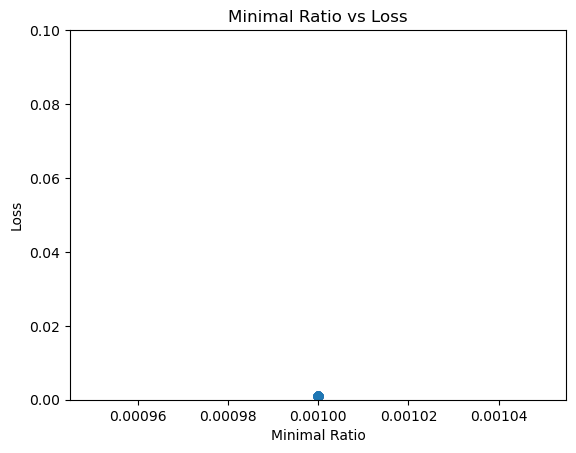

In [7]:
plt.figure()
plt.plot(min_ratios, losses, marker='o')
plt.xlabel('Minimal Ratio')
plt.ylabel('Loss')
plt.ylim(0, 0.1)
plt.title('Minimal Ratio vs Loss')
plt.show()